In [1]:

import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override() # <== that's all it takes :-)
import datetime 
%matplotlib inline

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
BAC = pdr.get_data_yahoo('BAC', start, end)

# City Group
C = pdr.get_data_yahoo('C', start, end)

# Goldman Sachs
GS = pdr.get_data_yahoo('GS', start, end)

# JP Morgon Chase
JPM = pdr.get_data_yahoo('JPM', start, end)

# Morgon Stanley
MS = pdr.get_data_yahoo('MS', start, end)

# Wells Fargo
WFC = pdr.get_data_yahoo('WFC', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [12]:
# bank_stocks.head()

bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']


In [13]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.695660  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.348431  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.390091  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.341476  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.362324  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.310356  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.333885  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.428024  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.463337  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.828156  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.695114  11016400  
2006-01-04   31.530001  19.466671  10870000  
2006-01-05   31.495001  19.445066  10158000  
2006-01-06   31.680000  19.559286   8403800  
2006-01-09   31.674999  19.556198   5619600  

[5 rows x 36 columns]

In [14]:
# for tick in tickers:
#     print(tick,bank_stocks[tick]['Close'].max())

bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [15]:
returns = pd.DataFrame()

In [16]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [17]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


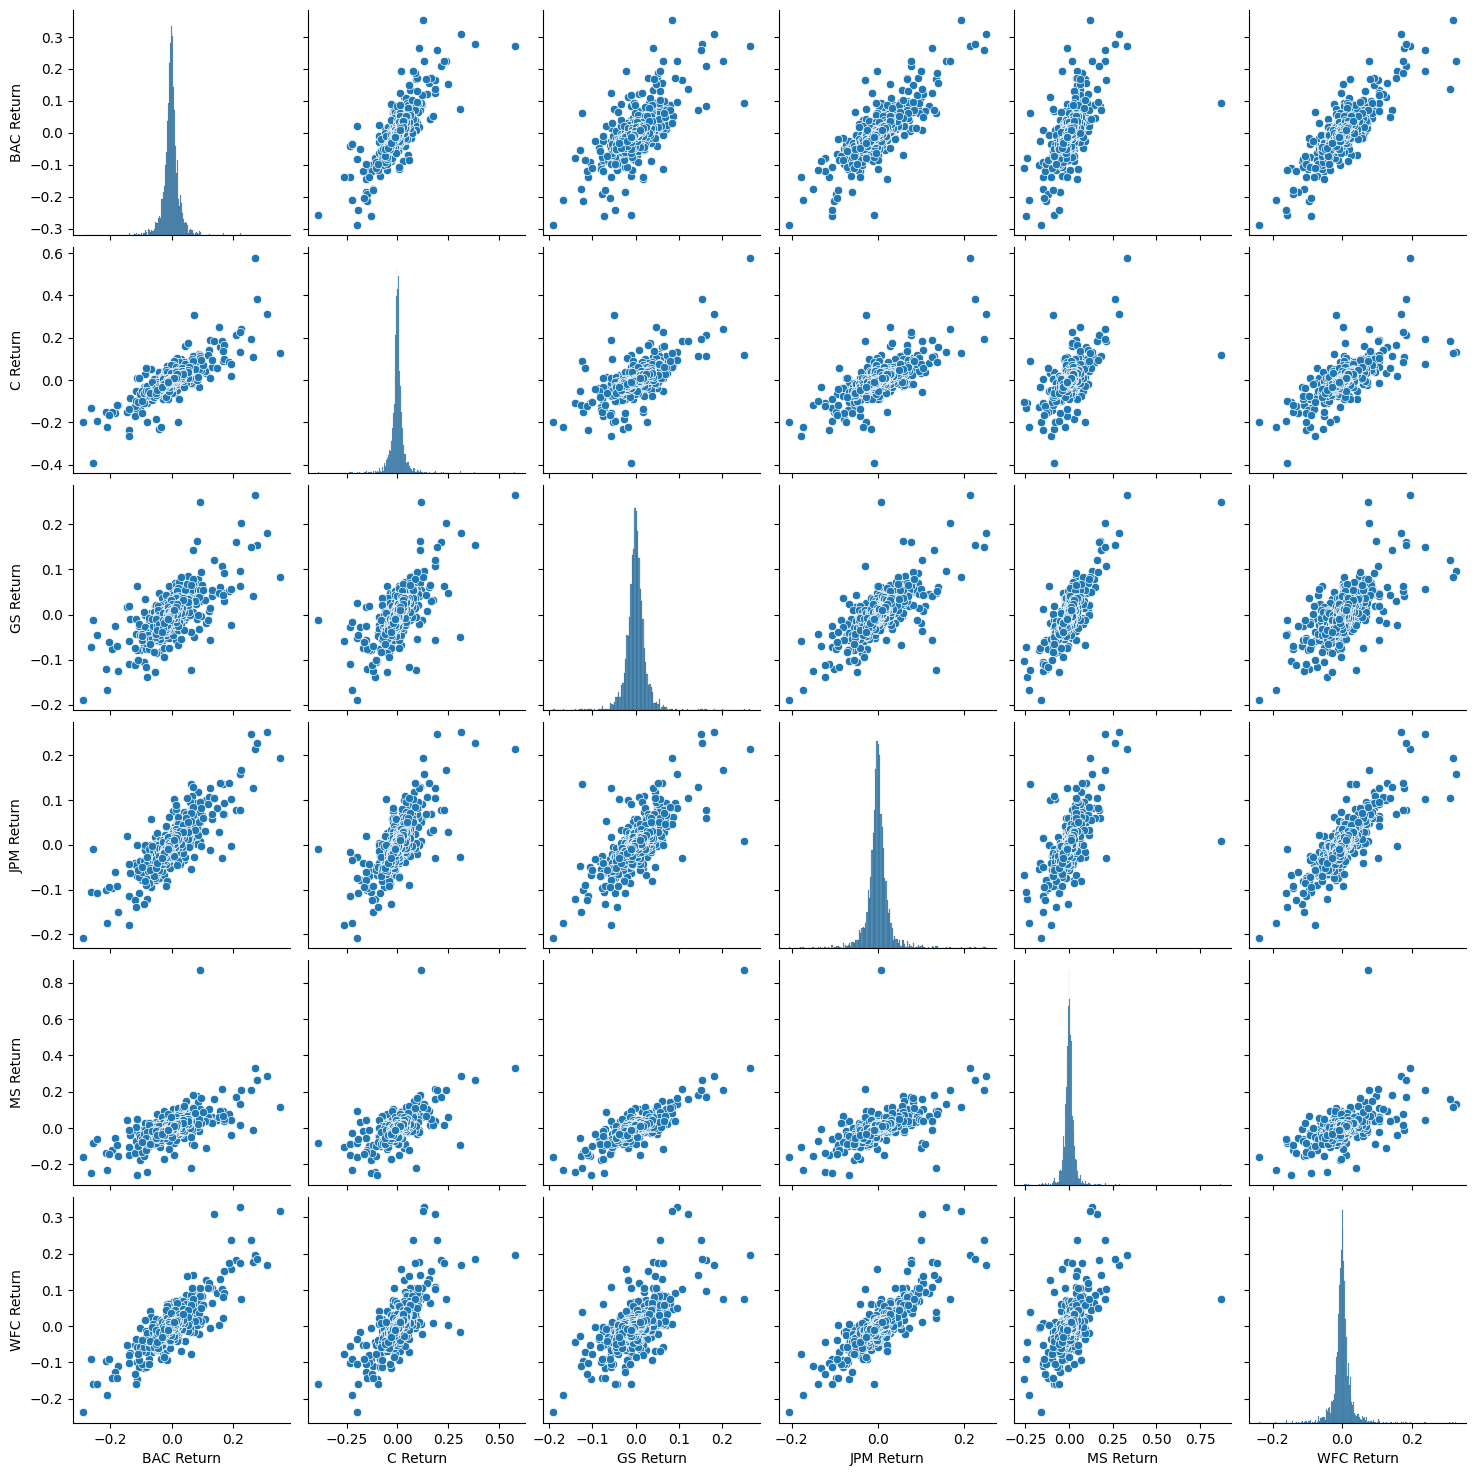

In [19]:
import seaborn as sns

sns.pairplot(returns[1:])

In [20]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [21]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [22]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [27]:
# .ix deprecated
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

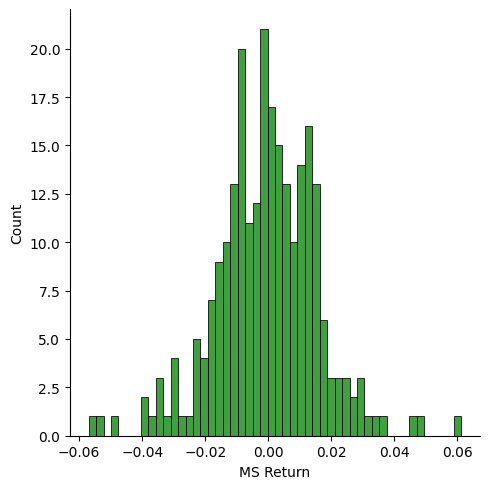

In [32]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50)

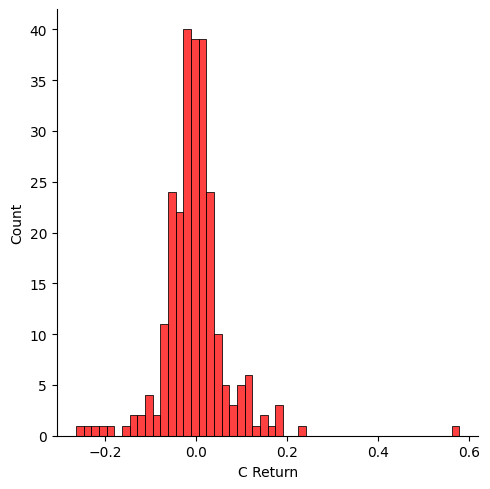

In [33]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)

In [34]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

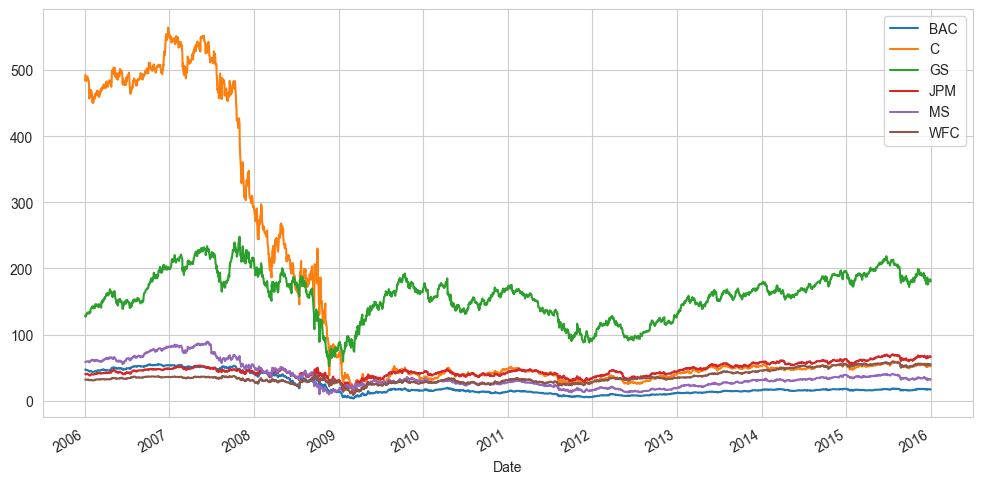

In [36]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,6))
plt.legend()

<Axes: xlabel='Date'>

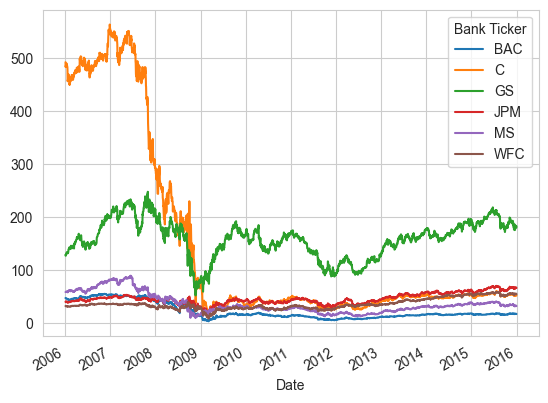

In [37]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [38]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

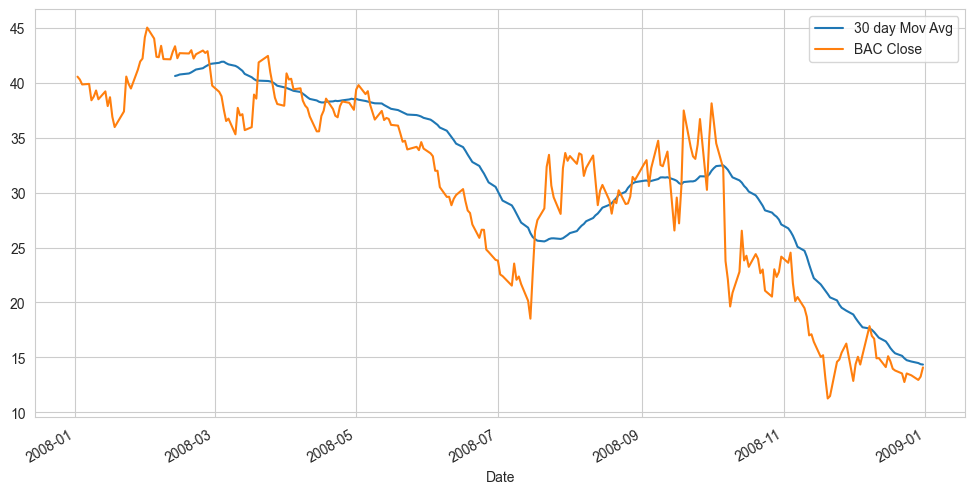

In [42]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

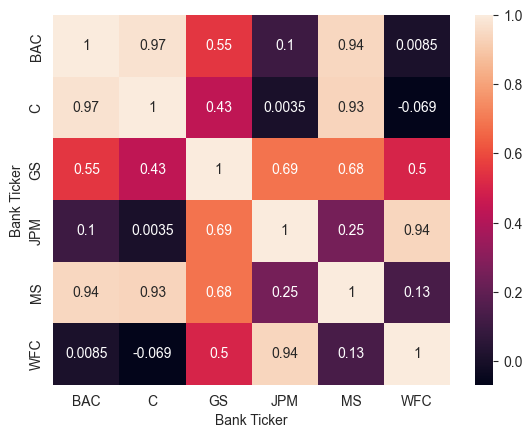

In [46]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

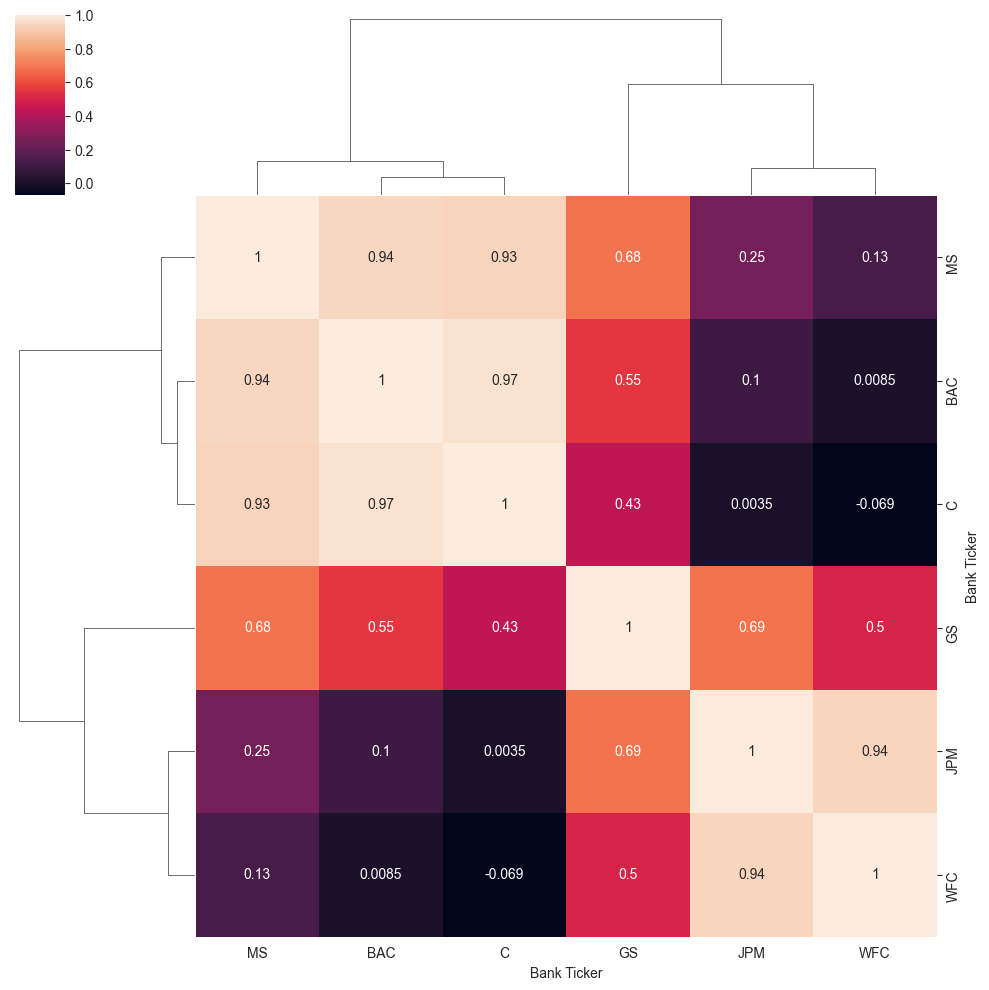

In [47]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)